## This session

In this session we'll first take a look at some of the shortcuts in JupyterHub -- see worksheet B2.

In some of the exercises below, you have a choice of whether to use an existing solution to an exercise or program your own. This is entirely up to you -- making use of code written by others is very common, so this is an exercise in itself!

The main point of this session is to practice plotting data. If you get stuck with the extra exercises to generate data, please do use the solution so you can continue.

## Plotting data

Building on our previous example, let's get some data that we can plot.

Let's try to plot:

* A histogram of word lengths -- how many 1-letter, 2-letter, 3-letter words etc.
* A histogram of sentence lengths (number of words)
* A plot which compares the length a sentence against the length of the longest word in that sentence.

We need to generate some data! For our first example, the data will be counts of each word length (how many 1-letter, 2-letter, 3-letter words etc.)

As before `Counter` will do this for us. Here's a function to generate the data:

In [4]:
from collections import Counter

def word_length_counts(text):
    words = text.split()
    lengths = [len(word) for word in words]
    return Counter(lengths)

Try this out:

In [5]:
print(word_length_counts("This is a test of word length counts!"))

Counter({4: 3, 2: 2, 1: 1, 6: 1, 7: 1})


## List comprehensions

The function above introduces a new Python structure called a *list comprehension*. This list comprehension:

```python
lengths = [len(word) for word in words]
```

is equivalent to:

```python
lengths = []
for word in words:
    lengths.append(len(word))
```

The meaning in each case is "calculate the length of each `word` in `words`".

There's more detail and an exercise on this in worksheet A3.

## A first data plot

Let's look at making a scatter plot of some data points. Here's the documentation:

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter

By convention we import `matplotlib` as:

```python
import matplotlib.pyplot as plt
```

The use of `as` means that we refer to `plt` rather than `matplotlib.pyplot`.

So instead of calling the function for a plot like this:

```python
matplotlib.pyplot.scatter(....
```

we can call it like this:

```python
plt.scatter(....
```

This makes the code more succinct.

Here's an example of making a plot:

```python
%matplotlib inline
import matplotlib.pyplot as plt
x_data = [1, 2, 3, 4, 5]
y_data = [16, 4, 2, 8, 1]
plt.scatter(x_data, y_data, color="red")
```

Try it out! Note the important line:

```python
%matplotlib inline
```

This tells Jupyter to show the plot inside the notebook.

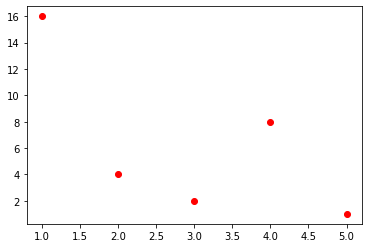

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
x_data = [1, 2, 3, 4, 5]
y_data = [16, 4, 2, 8, 1]
plt.scatter(x_data, y_data, color="red")

## Everything is data

As you might expect we can use data for more than just the `x` and `y` coordinates in the plot. What if we have a third variable that we want to represent somehow?

For example, we can use the size of the marker to show a third variable:

```python
q_data = [80, 18, 42, 22, 33]
plt.scatter(x_data, y_data, s=q_data)
```

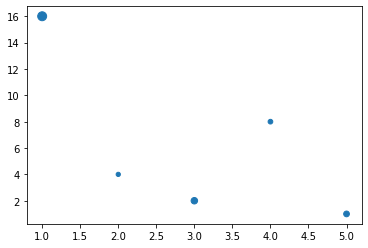

In [2]:
q_data = [80, 18, 42, 22, 33]
plt.scatter(x_data, y_data, s=q_data)

## Exercise: Real data!

First, run the function defined above, `word_length_counts()`, on our example text file, `reason.txt`. Keep the `Counter` you get as a result in a variable called `counts`.

In [8]:
input_file = open("reason.txt","r")
text = input_file.read()
counts = word_length_counts(text)

Remember that this `Counter` is similar to a Python dictionary. To plot it as a histogram, we can use a `matplotlib` bar chart. (`matplotlib` does have a histogram function more suitable for continuous data).

The `matplotlib` `bar()` function, though, is just expecting two lists of numbers! Here's an example, try it out:

```python
plt.bar([1, 2, 3, 4, 5],[99, 74, 33, 12, 18])
```

<BarContainer object of 5 artists>

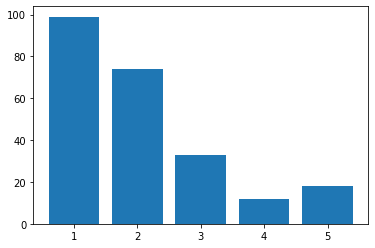

In [9]:
plt.bar([1, 2, 3, 4, 5],[99, 74, 33, 12, 18])

So we have data in this format:

```
Counter({1: 5, 2: 22, 3: 16, 4: 23, 5: 12, 7: 9, 8: 13, 9: 8})
```

and we want a list of counts:

```python
data = [5, 22, 16, 23, 12, 0, 9, 13, 8]
```

Note that there isn't a count for 6-letter words! So in the list the sixth entry must be zero. To plot this, we'd give this list (the heights of the bars) along with a list of sequential values for the positions of the bars (just the whole numbers starting from 1):

```python
plt.bar([1, 2, 3, 4, 5, 6, 7, 8, 9], data)
```

You may remember that we can use `range()` instead of this first list:

```python
plt.bar(range(1,10), data)
```

## Converting data

In order to plot our data, it needs to be formatted like the lists above. The first list, the x positions of the bars, will just be the numbers from 1 to the number of letters in the longest word.

The second list will be the counts of each length of word (number of 1-letter words, 2-letter words, 3-letter words and so on). 

The following function, `counts_for_plotting`, takes the `Counter` for all the word lengths and returns this second list. (The first list is just a `range()` with the length of the second list, so we don't need to return it).

In [1]:
def counts_for_plotting(counts):
    return [counts[x] for x in range(max(counts.keys())+1)]

## Exercise: Plotting the data

Have a look at the documentation for `bar()`:

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html?highlight=bar#matplotlib.pyplot.bar

Now that you have your data, you can simply plot it with:

```python
y = counts_for_plotting(counts)
x = range(1,len(y)+1)
plt.bar(x, y)
```

However this isn't a very attractive plot! Some suggestions:

* Add a title with `plt.title()`
* Change the bar colour
* Change the bar width so there isn't a gap between bars
* Label the axes with `plt.xlabel()` and `plt.ylabel()`

Try these out to finish off your plot.

<BarContainer object of 37 artists>

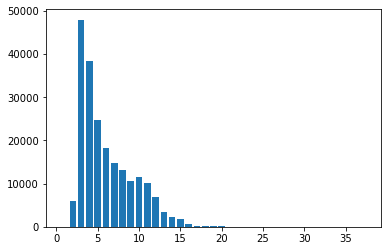

In [10]:
y = counts_for_plotting(counts)
plt.bar(range(1,len(y)+1), y)

## Extra exercise: Sentence lengths

For this exercise we're going back a little to last week -- this will generate some more data you can use.

Write a function which takes a filename, and counts the number of words per sentence. As above with word lengths, the function should return a `Counter`.

For simplicity, assume that:

* A sentence is always the text between a full stop "." and the next full stop. (If you're able, you could count "!" and "?" as ending sentences too). 
* A "word" is always the text between a space " " and the next space.

Some notes:

* First think about how you would separate the text into sentences.
* Then think about how you would measure the length of each sentence.
* Make a list of sentence lengths, then feed it to `Counter`.
* You'll use `split()` (a lot).
* You could use a text cleaning function if you want, though you'll have to make sure to preserve full stops in the text.
* You could use a loop or a list comprehension for this

**Note:** As before, you can use the solution to this exercise and just plot the data if you wish:

http://softdev.ppls.ed.ac.uk/python/answers.html#7


In [12]:
# with a loop
def sentence_lengths(filename):
    f = open(filename,"r")
    text = f.read()
    result = []
    for sentence in text.split("."):
        words = sentence.split()
        result.append(len(words))
    return Counter(result)

# with a list comprehension
def sentence_lengths(filename):
    text = open(filename,"r").read()
    return Counter([len(sentence.split()) for sentence in text.split(".")])       

Now you can:

* use `counts_for_plotting()` to get the data in a format you can plot
* plot this the same way as the word lengths, using a histogram.

<BarContainer object of 233 artists>

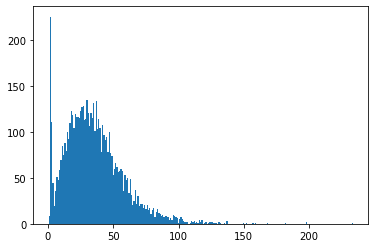

In [13]:
counts = sentence_lengths("reason.txt")
y = counts_for_plotting(counts)
plt.bar(range(1,len(y)+1), y, width=1, linewidth=0)

## Advanced exercise: Length of the sentence vs. length of longest word

Write a function which returns two lists, one of sentence length, and one of the longest word in the sentence. So for example:

   ```python
w_lengths, s_lengths = word_sentence_lengths("I wandered lonely as a cloud. No, really.")
```

   will give:

   ```python
   w_lengths = [8, 6]
   s_lengths = [6, 2]
```

   So each list has an entry for each sentence; `s_lengths` has the length of the sentence, and `w_lengths` has the length of the longest word.
   
**Note:** As before, you can use the solution to this exercise and just plot the data if you wish.

http://softdev.ppls.ed.ac.uk/python/answers.html#8


In [14]:
def clean_for_sentence(text):
    result = ""
    for character in text:
        if character.isalpha():
            result += character
        elif character in ".?!":
            # all of these end sentences, replace with . so we can split on this
            result += "."
        else:
            result += " "
    return result
            
def word_length_vs_sentence_length(filename):
    text = open(filename,"r").read()
    text = clean_for_sentence(text)
    sentence_lengths = []
    longest_word_lengths = []
    for sentence in text.split("."):
        words = sentence.split()
        if len(words) > 0:
            longest_word_lengths.append(max(len(word) for word in words))
            sentence_lengths.append(len(words))
    return longest_word_lengths, sentence_lengths

## Plotting longest word length vs. sentence length

Now you have the data, produce a scatter plot. This should give us an idea what the relationship is between word length and the length of the sentence it's in.

As above, look at what will make the plot look better and the shape of the data clearer. In particular:

* The size of the scatter markers
* Colour
* Opacity (you can make the markers translucent, which works better when there are a large number of points)

(0.0, 200.0)

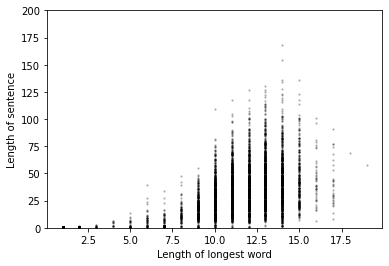

In [15]:
w_lengths, s_lengths = word_length_vs_sentence_length("reason.txt")
plt.scatter(w_lengths, s_lengths, s=2, alpha=0.2, color='black')
plt.xlabel("Length of longest word")
plt.ylabel("Length of sentence")
plt.ylim(0,200)

## Heatmap

There are a lot of points here. Even using opacity we don't get a good idea of the density of points with the scatter plot.

`matplotlib` can make heatmaps. Have a look at the `hist2d()` function:

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist2d.html?highlight=hist2d#matplotlib.pyplot.hist2d

This is appropriate to these data, as it will calculate the number of data points in each bin of the 2D histogram, as well as plotting the resulting heatmap.

Plot a 2D heatmap for the data.

Some tips:

* Switch the grid off with `plt.grid(False)`
* In `hist2d()`, use the parameter `bins=(x_bins, y_bins)` to have a different number of bins in `x` and `y` -- in particular, the number of bins in `x` should be based on the maximum word length!

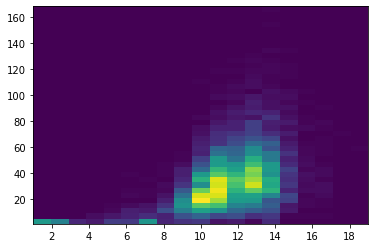

In [19]:
a = plt.hist2d(w_lengths, s_lengths, bins=(max(w_lengths),int(max(s_lengths)/4)))
plt.grid(False)